# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

# Reading,Exploring & Cleaning of Files


In [2]:
#import os
#print(os.getcwd())
#print(os.listdir(os.getcwd())

In [3]:
Intakes = pd.read_csv("C:\\Users\\HP PROBOOK 640\\Austin_Animal_Center_Intakes.csv")
Outcomes =pd.read_csv("C:\\Users\\HP PROBOOK 640\\Austin_Animal_Center_Outcomes.csv")
Stray_Map=pd.read_csv("C:\\Users\\HP PROBOOK 640\\Austin_Animal_Center_Stray_Map.csv")

In [4]:
intakes =pd.DataFrame(Intakes)
rows=len(intakes.axes[0])
cols=len(intakes.axes[1])
print("intakes contains " + str(rows) +  "  rows and "+ str(cols) +  " columns ", end="\n")


outcomes =pd.DataFrame(Outcomes)
rows=len(intakes.axes[0])
cols=len(intakes.axes[1])
print("outcomes contains " + str(rows)+" rows and " + str(cols)  + " columns " , end="\n")

stray_map =pd.DataFrame(Stray_Map)
rows=len(intakes.axes[0])
cols=len(intakes.axes[1])
print("stray_map contains" ,end=" " + str(rows)+" rows and "+ str(cols) +  " columns ")

intakes contains 124120  rows and 12 columns 
outcomes contains 124120 rows and 12 columns 
stray_map contains 124120 rows and 12 columns 

In [5]:
#Intakes.head()
#Intakes.info()
#Intakes.describe()
Outcomes.head()
Outcomes.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,124491,85466,124491,124491,124491,124471,57308,124491,124490,124486,124491,124491
unique,111309,19781,102921,102921,7100,9,23,5,5,52,2633,598
top,A721033,Max,04/18/2016 12:00:00 AM,04/18/2016 12:00:00 AM,04/21/2014,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,561,39,39,117,55347,30811,70516,43794,22130,31331,13070


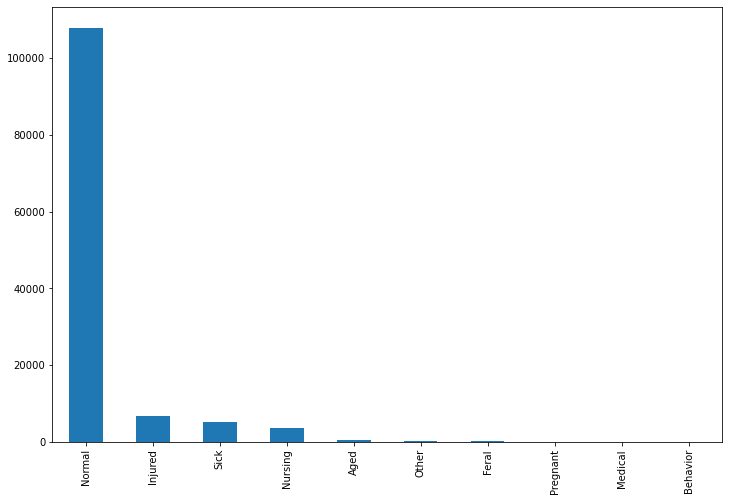

In [6]:
fig_size=(12, 8)
Intakes['Intake Condition'].value_counts()
Intakes['Intake Condition'].value_counts().plot.bar(figsize = fig_size)

In [7]:
Outcomes.head()
#Outcomes.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [8]:

def dropdupcols(df,col1,col2):
    if (df[col1] == df[col2]).mean() == 1:
        df.drop(columns=col2,inplace=True)
        print(df.dtypes)

dropdupcols(intakes,'DateTime','MonthYear')
dropdupcols(outcomes,'DateTime','MonthYear')

Animal ID           object
Name                object
DateTime            object
Found Location      object
Intake Type         object
Intake Condition    object
Animal Type         object
Sex upon Intake     object
Age upon Intake     object
Breed               object
Color               object
dtype: object
Animal ID           object
Name                object
DateTime            object
Date of Birth       object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object


In [9]:
#Converting Intake Type,Intake Condition,Animal Type,Sex upon Intake to Categorical variable
intakes['Intake Type'] = intakes['Intake Type'].astype('category')
intakes['Intake Condition'] = intakes['Intake Condition'].astype('category')
intakes['Animal Type'] = intakes['Animal Type'].astype('category')
intakes['Sex upon Intake'] = intakes['Sex upon Intake'].astype('category')

#Converting Outcome Type,Outcome Condition,Animal Type,Sex upon Outcome to Categorical variable
outcomes['Outcome Type'] = outcomes['Outcome Type'].astype('category')
outcomes['Outcome Subtype'] = outcomes['Outcome Subtype'].astype('category')
outcomes['Animal Type'] = outcomes['Animal Type'].astype('category')
outcomes['Sex upon Outcome'] = outcomes['Sex upon Outcome'].astype('category')

In [10]:
#percentage of values that are missing
print("Intakes\n")
for col in intakes.columns:
    missing= intakes[col].isnull().mean()
    print(f"{col} - {missing : .3%}")
    
print("\nOutcomes\n")
for col in outcomes.columns:
    missing = outcomes[col].isnull().mean()
    print(f'{col} - {missing : .3%}')

Intakes

Animal ID -  0.000%
Name -  31.462%
DateTime -  0.000%
Found Location -  0.000%
Intake Type -  0.000%
Intake Condition -  0.000%
Animal Type -  0.000%
Sex upon Intake -  0.001%
Age upon Intake -  0.000%
Breed -  0.000%
Color -  0.000%

Outcomes

Animal ID -  0.000%
Name -  31.348%
DateTime -  0.000%
Date of Birth -  0.000%
Outcome Type -  0.016%
Outcome Subtype -  53.966%
Animal Type -  0.000%
Sex upon Outcome -  0.001%
Age upon Outcome -  0.004%
Breed -  0.000%
Color -  0.000%


In [11]:
#replacing missing values as unknown
intakes['Sex upon Intake'].fillna("Unknown",inplace=True)
outcomes['Sex upon Outcome'].fillna("Unknown",inplace=True)
outcomes['Outcome Type'].cat.add_categories("Unknown", inplace=True)
outcomes['Outcome Type'].fillna("Unknown",inplace=True)
outcomes['Outcome Subtype'].cat.add_categories("Unknown", inplace=True)
outcomes['Outcome Subtype'].fillna("Unknown",inplace=True)

In [12]:
#Converting all Age to months
def ageconvert(age):
    if age == "nan":

        return age
    
    split = str(age).split(' ',1)
   
    try:
        if split[1] == 'week' or split[1] == 'weeks':
            # The average number of weeks in a month is 4.345
            age_months = round(float(split[0])/4.345)
        if split[1] == 'year' or split[1] == 'years':
            age_months = float(split[0])/12
        if split[1] == 'day' or split[1] == 'days':
            age_months = round(float(split[0])/30)
        else: 
            age_months = float(split[0])
    except:
        age_months = np.nan

    if age_months < 0:
        # It is not possible for us to know what the negative ages were intended to be, so these are changed to null values.
        age_months = np.nan
    
    return age_months    
    
intakes['Age upon Intake Months'] = intakes['Age upon Intake'].apply(ageconvert)
outcomes['Age upon Outcome Months'] = outcomes['Age upon Outcome'].apply(ageconvert)
#stray_map['Age Months'] = stray_map['Age'].apply(ageconvert)
       
        

In [13]:
intakes['Age upon Intake Months'].describe()

count    124113.000000
mean          3.374127
std           2.940942
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          25.000000
Name: Age upon Intake Months, dtype: float64

In [14]:
outcomes['Age upon Outcome Months'].describe()

count    124479.000000
mean          3.490926
std           2.932903
min           0.000000
25%           2.000000
50%           2.000000
75%           5.000000
max          25.000000
Name: Age upon Outcome Months, dtype: float64

# common age upon Intake

C:\Users\HP PROBOOK 640\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


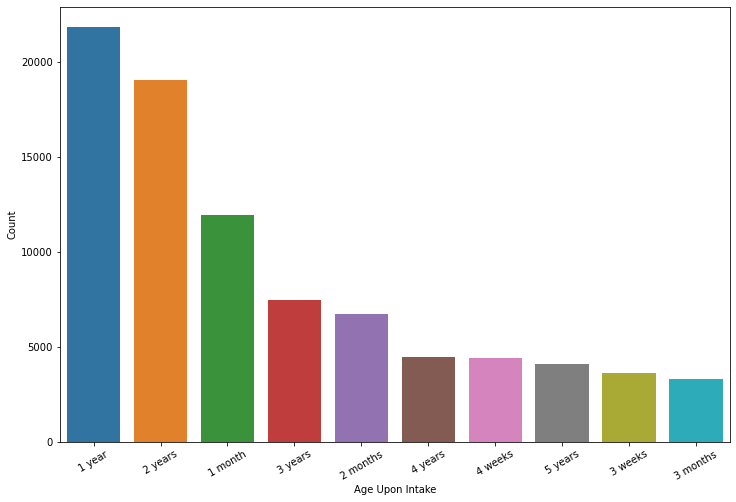

In [15]:
age_upon_intake = intakes['Age upon Intake'].value_counts().head(10)
plt.figure(figsize=(12,8))
_ = sns.barplot(age_upon_intake.index, age_upon_intake.values)
plt.xlabel("Age Upon Intake")
plt.ylabel("Count")
for item in _.get_xticklabels():
    item.set_rotation(30)
plt.show()

# Common age upon Outcome


C:\Users\HP PROBOOK 640\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


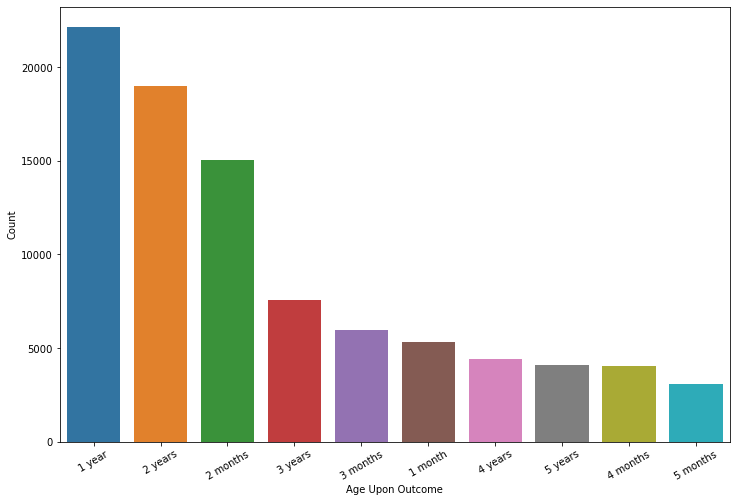

In [16]:
age_upon_outcome = outcomes['Age upon Outcome'].value_counts().head(10)
plt.figure(figsize=(12,8))
_ = sns.barplot(age_upon_outcome.index, age_upon_outcome.values)
plt.xlabel("Age Upon Outcome")
plt.ylabel("Count")
for item in _.get_xticklabels():
    item.set_rotation(30)
plt.show()

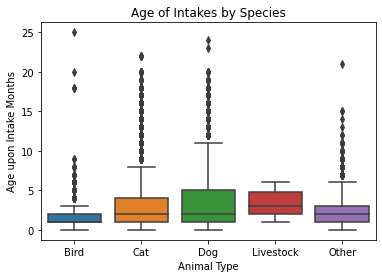

In [17]:
sns.color_palette()
a = sns.boxplot(data=intakes, x='Animal Type', y ='Age upon Intake Months')
a=plt.title('Age of Intakes by Species')

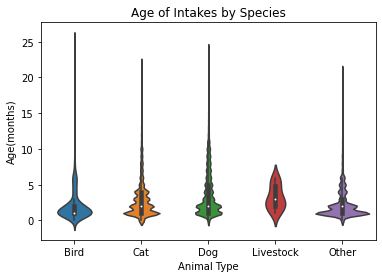

In [18]:
a= sns.violinplot(x='Animal Type',y='Age upon Intake Months',data=intakes)
a=plt.xlabel('Animal Type')
a=plt.ylabel('Age(months)')
a=plt.title('Age of Intakes by Species')
plt.show()

# Count of the types of Animal in the welfare center

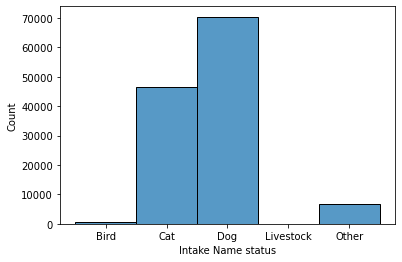

In [19]:
a= sns.histplot(x='Animal Type',data=intakes)
a=plt.xlabel('Intake Name status')

# Count of Intakes with and without Names

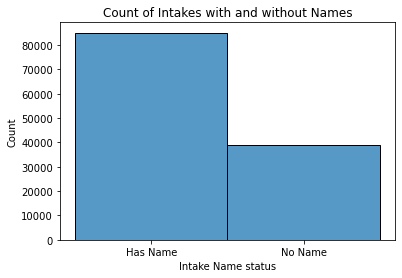

In [20]:
intakes['Named'] = intakes['Name'].isnull().map({True:"No Name",False:'Has Name'})

a= sns.histplot(data=intakes,x='Named')
a=plt.xlabel('Intake Name status')
a=plt.title('Count of Intakes with and without Names')

# Unique Intakes and Repeated Intakes

In [21]:
intakes_dup = intakes[intakes['Animal ID'].duplicated(keep=False)]

intakes_uniq = intakes[~intakes['Animal ID'].duplicated(keep=False)]

In [22]:
dup_count = intakes_dup[['Intake Type','Animal Type','Animal ID']].groupby(['Intake Type','Animal Type']).count()
dup_count.rename(columns= {'Animal ID': 'Count'},inplace=True)
dup_count['Percentage'] = dup_count['Count']/ dup_count['Count'].sum()


uniq_count = intakes_uniq[['Intake Type','Animal Type','Animal ID']].groupby(['Intake Type','Animal Type']).count()
uniq_count.rename(columns= {'Animal ID': 'Count'},inplace=True)
uniq_count['Percentage'] = uniq_count['Count']/ uniq_count['Count'].sum()


dup_vs_uniq = dup_count.merge(uniq_count,left_index = True, right_index = True, suffixes=[" multiple intakes"," unique intakes"])
dup_vs_uniq = dup_vs_uniq.fillna(0)
print(f"The total count of unique intakes is {uniq_count['Count'].sum()} ")
print(f"The total count of multiple intakes is {dup_count['Count'].sum()} ")

dup_vs_uniq.style.format({
    'Percentage multiple intakes': '{:,.2%}'.format,
    'Percentage unique intakes': '{:,.2%}'.format,
})

The total count of unique intakes is 100823.0 
The total count of multiple intakes is 23297.0 


<Figure size 432x288 with 0 Axes>

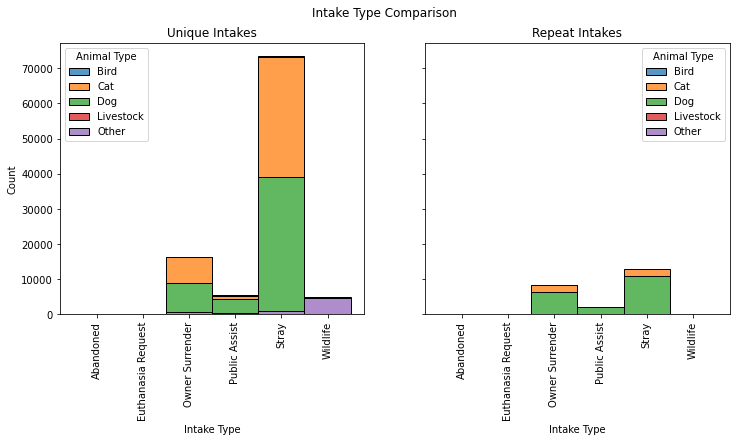

In [23]:
plt.clf()



fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,5))
a = fig.suptitle('Intake Type Comparison')


a = sns.histplot(intakes_uniq, x='Intake Type', hue='Animal Type', multiple='stack', ax=ax[0])
a = ax[0].set_title('Unique Intakes')
a = ax[0].tick_params(axis='x', rotation=90)


a = sns.histplot(intakes_dup, x='Intake Type', hue='Animal Type', multiple='stack', ax=ax[1])
a = ax[1].set_title('Repeat Intakes')
a= ax[1].tick_params(axis='x', rotation=90)


plt.show();

# Distribution of Animal Intakes per month

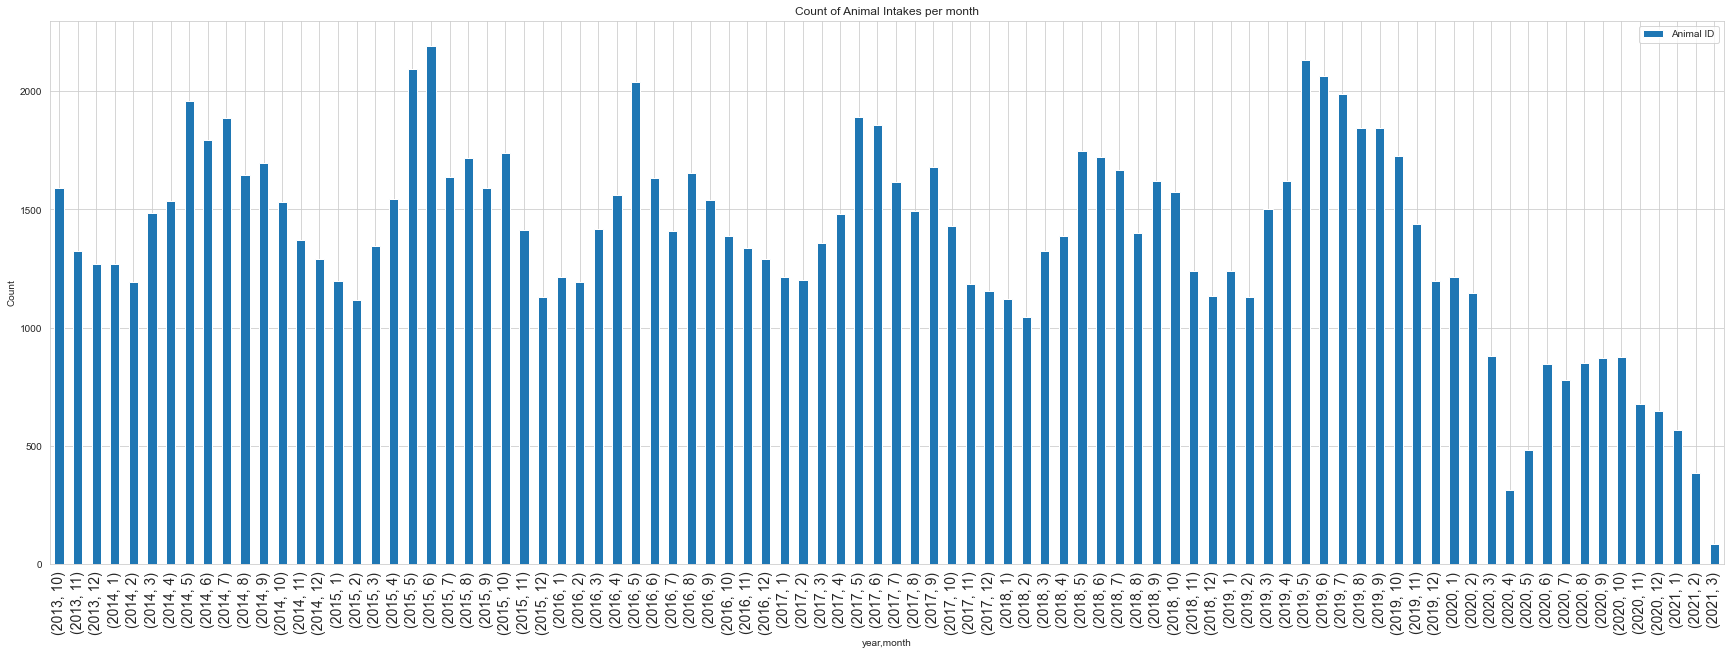

In [24]:
sns.set_style("whitegrid")

intakes['DateTime'] = pd.to_datetime(intakes['DateTime'], errors='coerce')

intakes['month'] = intakes['DateTime'].dt.month
intakes['year'] = intakes['DateTime'].dt.year

in_month = intakes[['Animal ID','year','month']].groupby(['year','month']).count()

a = in_month.plot(kind='bar',figsize=(30,10))
a = plt.ylabel('Count')
a = plt.xticks(fontsize=14)
a = plt.title('Count of Animal Intakes per month')

# count of intakes per year

In [25]:
intakes['year'].sort_values().value_counts().

SyntaxError: invalid syntax (<ipython-input-25-d91bccc3bedb>, line 1)

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=intakes['year'] , data=intakes, orient='v')
plt.title('Count of Intakes by Year - All years', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Count of Intakes', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Count of Intakes by Month of year

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=intakes['month'] , data=intakes, orient='v')
plt.title('Count of Intakes by Month of Year - All years', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Count of Intakes', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# correlation between months of intake and intake type

In [ ]:
in_by_month =intakes.groupby(['Intake Type',intakes.DateTime.dt.month]).agg({'Animal ID':'count'}).reset_index()

in_by_month.rename(columns={'Animal ID':'Count'},inplace=True)
in_by_month_wide = in_by_month.pivot_table(index="DateTime",columns='Intake Type',values='Count')
in_by_month


f, ax = plt.subplots(figsize=(9, 9))
a= sns.heatmap(in_by_month_wide, annot=True, fmt="d", linewidths=.5, ax=ax,cmap="YlGnBu")
a = plt.xticks(fontsize=14, rotation=45)
a = plt.ylabel('Month of Intake',fontsize=14)
a = plt.title('Intake Type by Month ')

# Distribution of outcomes


In [ ]:
sns.set_style("whitegrid")

outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'], errors='coerce')

outcomes['month'] = outcomes['DateTime'].dt.month
outcomes['year'] = outcomes['DateTime'].dt.year

in_month = outcomes[['Animal ID','year','month']].groupby(['year','month']).count()

a = in_month.plot(kind='bar',figsize=(30,10))
a = plt.ylabel('Count')
a = plt.xticks(fontsize=14)
a = plt.title('Count of Animal Intakes per month')

# Count of Outcomes by type

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Outcome Type', data=Outcomes, orient='v')
plt.title('Count of Outcomes by Type - All', fontsize=18)
plt.xlabel('Outcome Type', fontsize=16)
plt.ylabel('Count of Outcomes', fontsize=16)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=12);

# count of outcomes by year

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=outcomes['year'] , data=outcomes, orient='v')
plt.title('Count of Outcomes by Year - All years', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Count of outcomes', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Count of Outcomes by Month OF YEAR

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=outcomes['month'] , data=Outcomes, orient='v')
plt.title('Count of Outcomes by Month of Year - All years', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Count ofOutcomes', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
#Distribution of animal type by their outcome 
a = sns.histplot(x='Animal Type', hue = 'Outcome Type', data = outcomes, multiple ='dodge')

out_by_animal = outcomes[['Animal ID','Outcome Type','Animal Type']].groupby(['Animal Type','Outcome Type']).count()
out_by_animal.rename(columns = {'Animal ID':'Count'},inplace=True)
out_by_animal

In [ ]:
sns.set_style("whitegrid")

outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'], errors='coerce')


outcomes['month'] = outcomes['DateTime'].dt.month
outcomes['year'] = outcomes['DateTime'].dt.year

out_month = outcomes[['Animal ID','year','month']].groupby(['year','month']).count()

a= out_month.plot(kind='bar',figsize=(30,10))
a = plt.ylabel('Count')
a = plt.xticks(fontsize=14)
a = plt.title('Count of Animal Outcomes per month')

In [ ]:
outcomes_uniq = outcomes[~outcomes['Animal ID'].duplicated(keep=False)]

in_out_uniq = intakes_uniq.merge(right=outcomes_uniq, how='left', on='Animal ID',suffixes=['_in','_out'])

count_in_out = in_out_uniq[['Animal ID','Intake Type','Outcome Type']].groupby(['Intake Type','Outcome Type']).count()

count_in_out

# Distribution of intake type and Outcome type

In [ ]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.histplot(x='Intake Type',hue='Outcome Type',data = in_out_uniq,multiple ='dodge', ax=ax)

# Correlation between intake type and Outcome type

In [ ]:
in_out_type = in_out_uniq.groupby(['Intake Type','Outcome Type']).agg({'Animal ID':'count'}).reset_index()

in_out_type.rename(columns= {'Animal ID': 'Count'},inplace=True)
in_out_wide = in_out_type.pivot_table(index='Outcome Type',columns='Intake Type',values='Count')

f, ax = plt.subplots(figsize=(9, 9))
_ = sns.heatmap(in_out_wide, annot=True, fmt="d", linewidths=.5, ax=ax,cmap="YlGnBu")
_ = plt.xticks(rotation=45)
_ = plt.ylabel('Outcome type',fontsize=14)
_ = plt.title('Intake Type and Outcome Type ')

# Distribution of the breed by their animal type

In [ ]:
animal_type = intakes['Animal Type'].value_counts()
animal_type.plot.bar(figsize=fig_size)
plt.title('Count of Breeds by their Animal Type', fontsize=18)
plt.xlabel('Animal Type', fontsize=18)
plt.ylabel('Count of Breeds', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


In [ ]:
# Donut Plot
plt.figure(figsize=(12,8))

plt.pie(animal_type, labels=animal_type.index, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], 
        autopct='%1.1f%%', pctdistance=1.1, labeldistance=0.5)  # Create a pieplot
my_circle = plt.Circle( (0,0), 0.7, color='white') # add a circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Animal Type Distribution- ALL', fontsize=30);
plt.show()

# Intake TYPE

In [ ]:
intake_type = Intakes['Intake Type'].value_counts().head(4)
plt.figure(figsize=(6,6))
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05)
plt.pie(intake_type, colors = colors, labels=intake_type.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Intake Type Distribution- ALL', fontsize=15);
plt.show()

# Intake Condition

In [ ]:
intake_condition = Intakes['Intake Condition'].value_counts().head(4)
plt.figure(figsize=(6,6))
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05)
plt.pie(intake_condition, colors = colors, labels=intake_condition.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Intake Condition',fontsize=20)
plt.show()

In [ ]:
int =Intakes['Name'].groupby(Intakes['Animal Type'])
int.groups
int.describe()
#int.plot.bar(figsize=fig_size)

In [ ]:
Intakes['Name'].value_counts().head(15).plot.bar(figsize = fig_size)
plt.title('Count of  Name', fontsize=18)
plt.xlabel('Name', fontsize=18)
plt.ylabel('Count of Animals', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
into =Intakes['Breed'].groupby(Intakes['Animal Type'])
into.describe()

In [ ]:
int =Intakes['Intake Type'].groupby(Intakes['Animal Type'])
int.groups
int.describe()

In [ ]:
int =Intakes['Color'].groupby(Intakes['Animal Type'])
int.groups
int.describe()

In [ ]:
int = Intakes[Intakes['Animal Type'] == 'Dog'] 
int1= int.Breed
int1.describe()


# Outcome Type

In [ ]:
outcome_type = Outcomes['Outcome Type'].value_counts().head(4)
plt.figure(figsize=(6,6))
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05)
plt.pie(outcome_type, colors = colors, labels=outcome_type.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title("Outcome Type",fontsize=15)
plt.show()


# TOP BREEDS OF ANIMALS THAT CAME IN AND GOT OUT 

In [ ]:


#TOP 20 BREEDS of the Animals brought in.
Intakes['Breed'].value_counts().head(20)

In [ ]:
#TOP 20 breeds that left the animal center
Outcomes['Breed'].value_counts().head(20)

# distribution of dogs by their intake type

In [ ]:
dogs   = Intakes[Intakes['Animal Type'] == 'Dog']
dogs.head()
dogs['Intake Type'].value_counts().plot.bar(figsize = fig_size)
plt.title('Count of dogs by their Intake Type', fontsize=18)
plt.xlabel('Intake Type', fontsize=18)
plt.ylabel('Count of Dogs', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
dogs   = Intakes[Intakes['Animal Type'] == 'Dog']
dogs.head()
dogs['Name'].value_counts().head(10).plot.bar(figsize = fig_size)
plt.title('Count of dogs by their Nmae', fontsize=18)
plt.xlabel('Name', fontsize=18)
plt.ylabel('Count of Dogs', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
#TOP 10 BREEDS OF DOGS THAT WAS TAKEN INTO THE CENTER
dogs['Breed'].value_counts().head(10).plot.bar(figsize = fig_size)
plt.title('Count of dogs by their breeds', fontsize=18)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Count of Dogs', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
stray_dogs = dogs[dogs['Intake Type'] == 'Stray']

# Top 20
stray_dogs['Breed'].value_counts().head(20).plot.bar(figsize = fig_size)
plt.title('Count of Stray_dogs by their breeds', fontsize=18)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Count of Dogs', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
#the breeds owners surrendered to the center
#maybe they are difficult to take care of
owner_surrender = dogs[dogs['Intake Type'] == 'Owner Surrender']

# Top 20
owner_surrender['Breed'].value_counts().head(20).plot.bar(figsize = fig_size)
plt.title('Count of dogs surrendered by owners by their breeds', fontsize=18)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Count of Dogs', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
dogs   = Intakes[Intakes['Animal Type'] == 'Dog'] 
dog= dogs.Color
dog.value_counts().head(20)
#int1.describe()
col = dog.value_counts().head(5)
plt.figure(figsize=(6,6))
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(col, colors = colors, labels=col.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Color Distribution OF Intakes- DOG', fontsize=15);
plt.show()

# distribution of dogs by their Outcomes

In [ ]:
doge   = Outcomes[Outcomes['Animal Type'] == 'Dog']
doge['Outcome Type'].value_counts()


In [ ]:
fig_size = (12, 8)

doge['Outcome Type'].value_counts().plot.bar(figsize=fig_size)
plt.title('Outcome Type of Dogs', fontsize=18)
plt.xlabel('Outcome Type', fontsize=18)
plt.ylabel('Count of Dogs', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
doge = Outcomes[Outcomes['Animal Type'] == 'Dog'] 
doge1= doge.Breed
doge1.describe()
doge1.sort_values().describe()

In [ ]:
dog = Outcomes[Outcomes['Animal Type'] == 'Dog'] 
doge2= dog.Color
doge2.value_counts().head(20)
#doge2.describe()
col = doge2.value_counts().head(5)
plt.figure(figsize=(6,6))
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(col, colors = colors, labels=col.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Color Distribution- DOG', fontsize=15);
plt.show()


# comparison between Dog sex upon intake and sex upon outcome 

this shows there is high chance of an animal to be adopted when it is spayed or neutered to the animal being intact

In [ ]:
fig_size = (12, 8)

x = pd.DataFrame({'Intakes': dogs['Sex upon Intake'].value_counts(), 'Outcomes': doge['Sex upon Outcome'].value_counts()}, index = dogs['Sex upon Intake'].unique())
ax = x.plot.bar(rot=0, figsize = fig_size)
plt.title('comparison between sex upon intake and sex upon outcome', fontsize=18)
plt.xlabel('Sex Type', fontsize=18)
plt.ylabel('Count of Dogs', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Cats

In [ ]:
cats = Intakes[Intakes['Animal Type'] == 'Cat'] 
cats1= cats.Breed
cats1.describe()


In [ ]:
cats= Intakes[Intakes['Animal Type'] == 'Cat']
cats.head()
int['Intake Type'].value_counts().plot.bar(figsize = fig_size)
plt.title('Count of cat by their Intake Type', fontsize=18)
plt.xlabel('Intake Type', fontsize=18)
plt.ylabel('Count of Cats', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
cats = Intakes[Intakes['Animal Type'] == 'Cat'] 
cats2= cats.Color
cats2.describe()


In [ ]:
#TOP 10 BREEDS OF Cats THAT WAS TAKEN INTO THE CENTER
cats['Breed'].value_counts().head(10).plot.bar(figsize = fig_size)
plt.title('Intakes of Cats by their breeds', fontsize=18)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Count of Cats', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
cats  = Intakes[Intakes['Animal Type'] == 'Cat']
cats.head()
cats['Name'].value_counts().head(10).plot.bar(figsize = fig_size)
plt.title('Count of cats by their Nmae', fontsize=18)
plt.xlabel('Name', fontsize=18)
plt.ylabel('Count of Cats', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
stray_cats = cats[cats['Intake Type'] == 'Stray']

# Top 20
stray_cats['Breed'].value_counts().head(10).plot.bar(figsize = fig_size)


plt.title('Count of Stray_cats by their breeds', fontsize=18)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Count of Cats', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


In [ ]:
owner_surrender = cats[cats['Intake Type'] == 'Owner Surrender']

# Top 20
owner_surrender['Breed'].value_counts().head(10).plot.bar(figsize = fig_size)
plt.title('Count of cats surrendered by owners', fontsize=18)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Count of Cats', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Distribution of Cats by their Outcomes

In [ ]:
cat = Outcomes[Outcomes['Animal Type'] == 'Cat'] 
cat1= cat.Breed
cat1.describe()
cat1.sort_values().describe()


In [ ]:
cat = Outcomes[Outcomes['Animal Type'] == 'Cat']
cat2=cat['Animal Type']
cat2.describe()

In [ ]:
cat = Outcomes[Outcomes['Animal Type'] == 'Cat']
cat2= cat.Color
cat2.value_counts().head(20)
#int1.describe()
col = cat2.value_counts().head(5)
plt.figure(figsize=(6,6))
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(col, colors = colors, labels=col.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Color Distribution- CAT', fontsize=15);
plt.show()

In [ ]:
cat['Outcome Type'].value_counts()

In [ ]:
fig_size = (12, 8)

cat['Outcome Type'].value_counts().plot.bar(figsize=fig_size)
plt.title('Outcome Type of Cats', fontsize=18)
plt.xlabel('Outcome Type', fontsize=18)
plt.ylabel('Count of Cats', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# comparison between Cat sex upon intake and sex upon outcome


In [ ]:
fig_size = (12, 8)

x = pd.DataFrame({'Intakes': cats['Sex upon Intake'].value_counts(), 'Outcomes': cat['Sex upon Outcome'].value_counts()}, index = cats['Sex upon Intake'].unique())
ax = x.plot.bar(rot=0, figsize = fig_size)

plt.title('comparison between Cat sex upon intake and sex upon outcome', fontsize=18)
plt.xlabel('Sex upon Outcome', fontsize=18)
plt.ylabel('Count of Cats', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# distribution of other animals

In [ ]:
other   = Intakes[Intakes['Animal Type'] == 'Other']
other.head()
other['Intake Type'].value_counts().plot.bar(figsize = fig_size)
plt.title('Count of others by their Intake Type', fontsize=18)
plt.xlabel('Intake Type', fontsize=18)
plt.ylabel('Count of others', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
other   = Outcomes[Outcomes['Animal Type'] == 'Other']
other.head()
other['Outcome Type'].value_counts().plot.bar(figsize = fig_size)
plt.title('Count of others by their Outcome Type', fontsize=18)
plt.xlabel('Outcome Type', fontsize=18)
plt.ylabel('Count of others', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
other['Breed'].value_counts().head(20).plot.bar(figsize = fig_size)
plt.title('Count of others by their Breed', fontsize=18)
plt.xlabel('Breed', fontsize=18)
plt.ylabel('Count of others', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
other['Name'].value_counts().head(20).plot.bar(figsize = fig_size)
plt.title('Count of others by their Name', fontsize=18)
plt.xlabel('Name', fontsize=18)
plt.ylabel('Count of others', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)